In [2]:
 from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
 from google.colab.patches import cv2_imshow

# Core Operations


<h3>As I mentioned, an image is represented as a grid of pixels.<br>
Imagine our grid as a piece of graph paper. Using this graph paper,<br>
the point ( 0, 0 ) corresponds to the upper left corner of the image.<br>
As we move down and to the right, both the x and y values increase.<h3>

 ## overview of the coordinate system

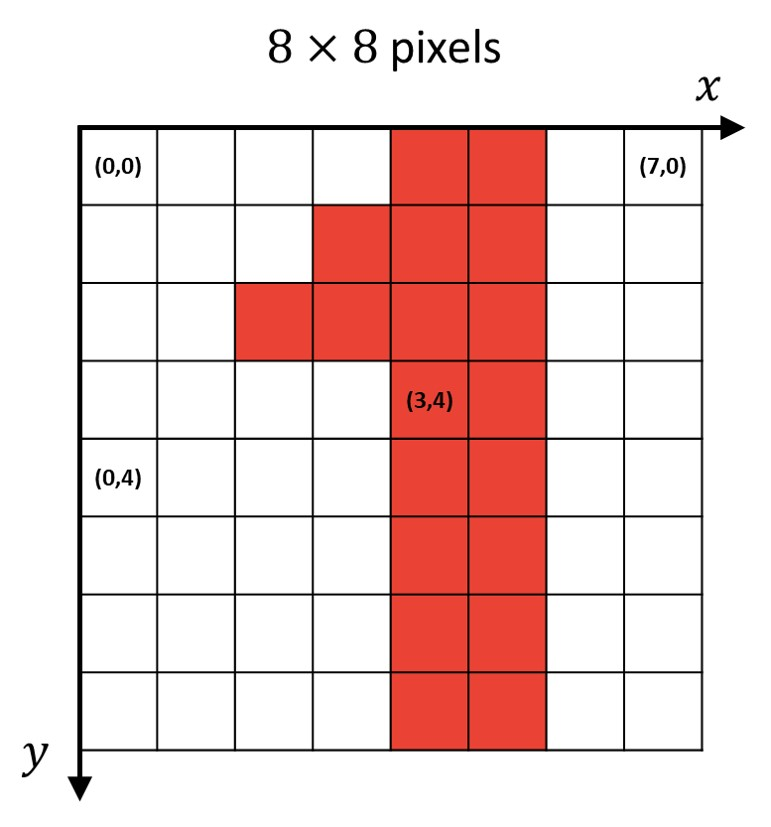

In [4]:
import cv2
coordinate = cv2.imread('/content/gdrive/My Drive/GSSummit/coordinate.jpg')
cv2_imshow(coordinate)

# 1. Basic Operation on Images

## Accessing and Manipulating Pixels
 OpenCV store images as B G R
     
         0    1     2
         B    G     R


By providing the co-ordinates i.e the <b>X</b> and <b>Y</b> value <br>
we can get the B G R value corresponding to that pixel point


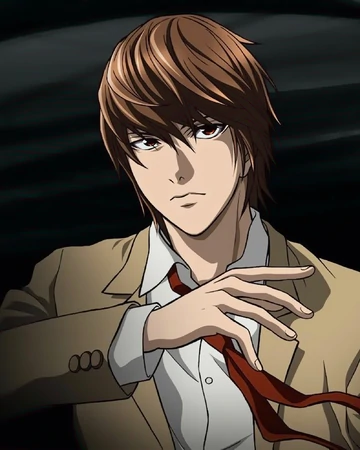

In [ ]:
import cv2       # importing cv2
import numpy as np
image = cv2.imread('/content/gdrive/My Drive/GSSummit/light.png')    # Reading an image
cv2_imshow(image)         # Displaying an Image

In [ ]:
print(image.shape)

(450, 360, 3)


In [ ]:
''' here we grab the pixel located at ( 255, 180 )
    This pixel is represented as a tuple.
'''
(b, g, r) = image[225,180]

In [ ]:
print("Pixel at (225, 180) - Blue: {}, Green: {}, Red: {}".format(b,g, r))

Pixel at (225, 180) - Blue: 182, Green: 208, Red: 238


In [ ]:
''' NumPy makes it easy to access pixel values, it also
    makes it easy to manipulate pixel values
'''
 
image[255, 180] = (0, 0, 255)
(b, g, r) = image[255, 180]
print("Pixel at (255, 180) - BLue: {}, Green: {}, Red: {}".format(b,g, r))

Pixel at (255, 180) - BLue: 0, Green: 0, Red: 255


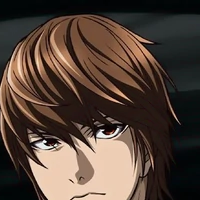

In [ ]:
'''we can also useNumPy’s array slicing capabilities
   to access larger rectangular portions of the image
   
     Here img takes four argument 
      Y1  -- Up  
      Y2  -- Down
      X1  -- Left
      X2  -- Right
   
'''
sl = image[0:200,100:300]
cv2_imshow(sl)         # Displaying an Image

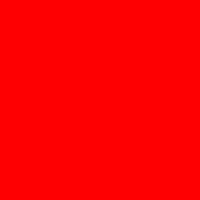

In [ ]:
m = image.copy()                # creating a copy of image
m[0:200,100:300] = (0, 0, 255)  # setting B = 0, G = 0, R = 255 .i.e setting and getting only Red values  
sl = m[0:200,100:300]
cv2_imshow(sl)

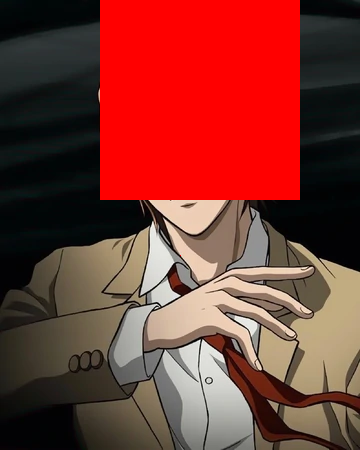

In [ ]:
 cv2_imshow(m)

## Splitting and Merging Image Channels
we can also get the individual Blue Green and Red channels of an image using <b>cv2.split()</b> function<br> and 
    then we can merge them back using <b>cv2.merge()</b>


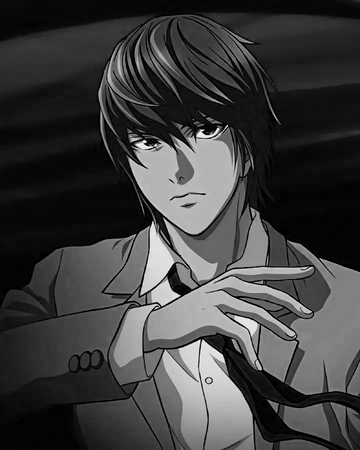

In [ ]:
# Splitting
(B, G, R) = cv2.split(image)
cv2_imshow(B)

In [ ]:
cv2_imshow(G)

In [ ]:
 cv2_imshow(R)

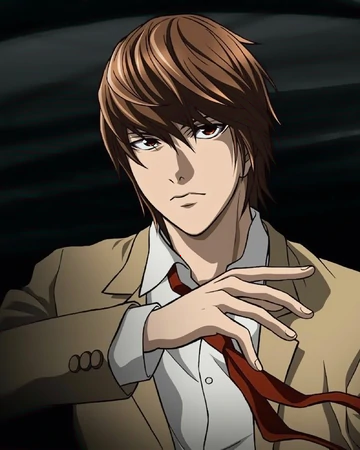

In [ ]:
 # Merging
merged = cv2.merge((B, G, R))
cv2_imshow(merged)

# 2. Arithmetic Operations on Images

## Image Addition
we can add two images by OpenCV function, <b>cv2.add()</b><br>
Both images should be of same depth and type

In [ ]:
''' Image Preprocessing
'''
img1 = cv2.imread('/content/gdrive/My Drive/GSSummit/light.png')      # Image reading
img1 = cv2.resize(img1, (347,350)) #  Image resizing
img2 = cv2.imread('/content/gdrive/My Drive/GSSummit/f.png')
img2 = cv2.resize(img2, (347,350))

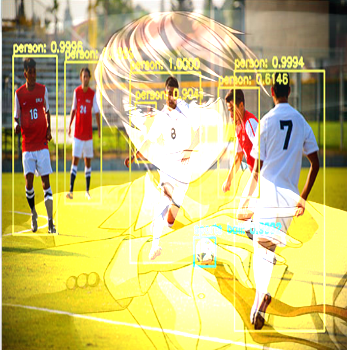

In [ ]:
''' Adding Image
'''
add = cv2.add(img1, img2)
cv2_imshow(add)

## Image Blending
This is also image addition, but different weights are given to images so that it gives a feeling of blending or transparency.

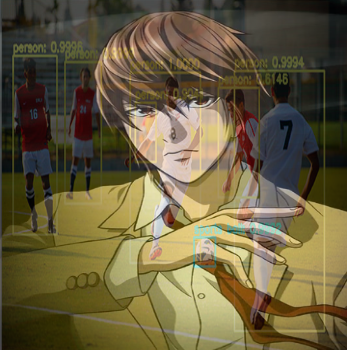

In [ ]:
''' Here I took two images to blend them together.
    First image is given a weight of 0.7 and second image is given 0.3.
    cv2.addWeighted() applies following equation on the image.
    
    
 
                dst = α*img1 + β*img2 + γ
                
 
'''
dst = cv2.addWeighted(img1,0.7,img2,0.3, 0)    # Image Blending
cv2_imshow(dst)

### Addition and Subtraction

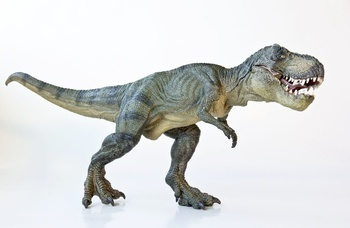

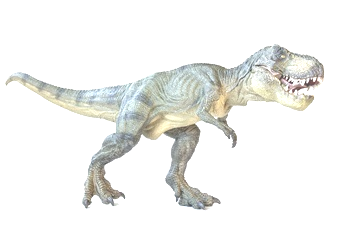

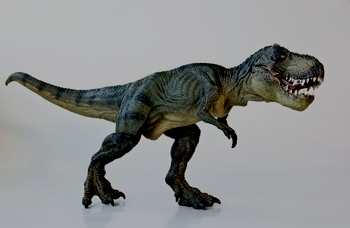

In [ ]:
import cv2
import numpy as np
 
img = cv2.imread('/content/gdrive/My Drive/GSSummit/d.png')
cv2_imshow(img)
 
''' We need an array to be added to or subtracted from Images
    this array needs to be the same size of original image
'''
m = np.ones(img.shape, dtype = 'uint8') * 75
 
add = cv2.add(img, m)
cv2_imshow(add)
 
sub = cv2.subtract(img, m)
cv2_imshow(sub)

# 3. Bitwise Operations
## AND, OR, XOR, and NOT
Bitwise operations operate in a binary manner and are represented as grayscale images.<br>
A given pixel is turned “off” if it has a value of zero, and it is turned “on” if the<br>
pixel has a value greater than zero.

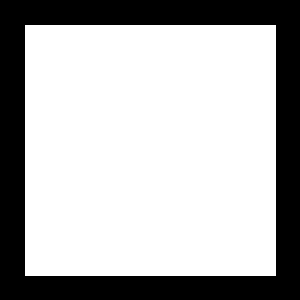

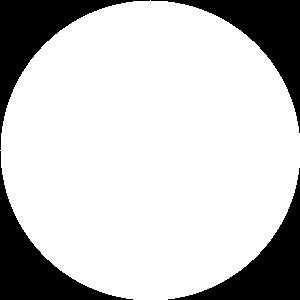

In [ ]:
import cv2
import numpy as np
 
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), (255, 255, 255), -1)
cv2_imshow(rectangle)
 
 
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, (255, 255, 255), -1)
cv2_imshow(circle)

<h3>1. AND: A bitwise AND is true if and only if both pixelsare greater than zero.<br>
2. OR: A bitwise OR is true if either of the two pixelsare greater than zero.<br>
3. XOR: A bitwise XOR is true if and only if either of the two pixels are greater than zero, but not both.<br>
4. NOT: A bitwise NOT inverts the “on” and “off” pixelsin an image.<h3>

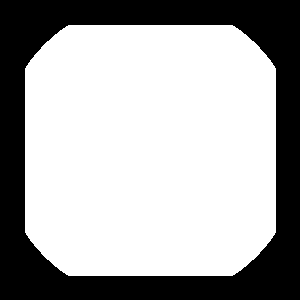

In [ ]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2_imshow(bitwiseAnd)

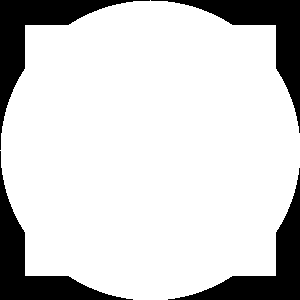

In [ ]:
 bitwiseOr = cv2.bitwise_or(rectangle, circle)
cv2_imshow(bitwiseOr)

# IMAGE PROCESSING
- Translation
- Rotation
- Resizing
- Flipping
- Cropping
- ColorSpaces

## Translation
Translation is the shifting of an image along the X and Y axis.<br>
Using translation, we can shift an image up, down,left, or right, <br>
along with any combination of the above

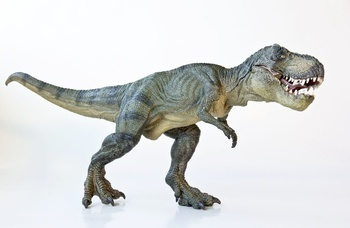

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/GSSummit/d.png')
cv2_imshow(img)

''' Translatios shift the image towards Right, left and diagonally
    cv2 has function wrapAffine which takes a translation matrix

           T = | 1  0  Tx |  Tx - shift along X-axis
               | 0  1  Ty |  Ty - shift along Y-axis

'''

In [ ]:
(h, w) = img.shape[:2]           # Finding Height and Width
(q_h, q_w) =(int(h/4), int(w/4))#  Calculating Quarter Height and Quarter Width

### Creating translation matrix

In [ ]:
m = np.float32([[1, 0, q_w], [0, 1, q_h]])
print(m)

[[ 1.  0. 87.]
 [ 0.  1. 57.]]


### Performing Translation

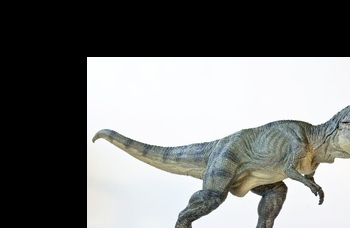

In [ ]:
translated = cv2.warpAffine(img, m, (w, h))
cv2_imshow(translated)
 
# Displaying Output

## Rotation
Rotation is exactly what it sounds like: rotating an image by some angle θ.<br>
θ is used to represent by how many degrees we are rotating the image.

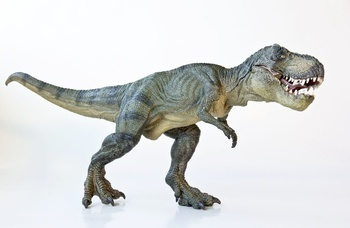

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/GSSummit/d.png')
cv2_imshow(img)

### Calculation Center Points

In [ ]:
h, w = img.shape[:2]
(x, y) = (int(img.shape[1]/2), int(img.shape[0]/2))

''' just like in translation we have a matrix used in rotation called rotation matrix

           | cos0  -sin0 |
       m = | sin0   cos0 |

       0(theta) = angle of ratation
     cv2.getRotationMartrix2D((center_x, center_y), angle_of_rotation, scale)

'''

## Performing Rotation

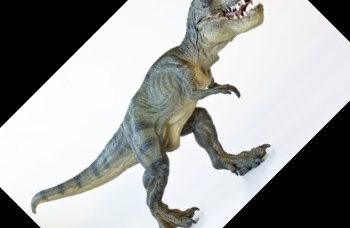

In [ ]:
rotate = cv2.getRotationMatrix2D((x, y), 45, 1)
rotation = cv2.warpAffine(img, rotate, (w, h))
cv2_imshow(rotation)

## Easy Method to perform rotation

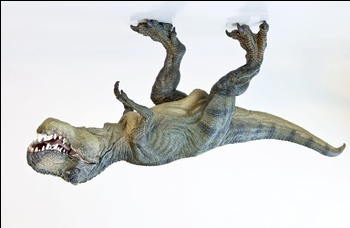

In [ ]:
import imutils
 
rot = imutils.rotate(img, 180)
 
cv2_imshow(rot)

## Resizing

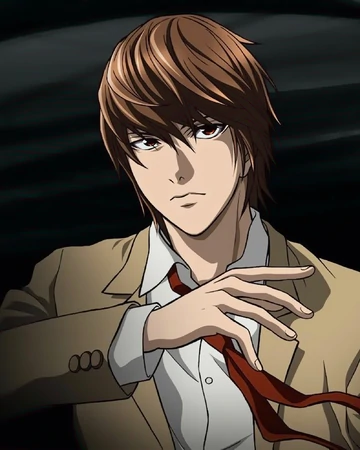

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/GSSummit/light.png')
cv2_imshow(img)

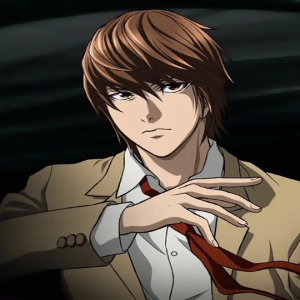

In [ ]:
g = img.copy()
height = 300
width  = 300
resize = cv2.resize(img, (height, width))
cv2_imshow(resize)

## Flipping
We can flip an image around either the x or
y axis, or even both

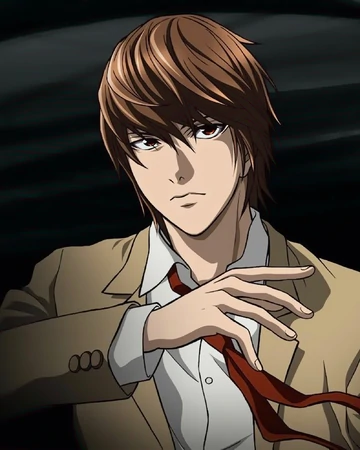

In [ ]:
image = cv2.imread('/content/gdrive/My Drive/GSSummit/d.png')
cv2_imshow(img)

Argument: <br>
1 means Flipped <b> Horizontally</b><br>
0 means Flipped <b> Vertically</b><br>
3 means Flipped <b> Horizontally & Vertically</b>

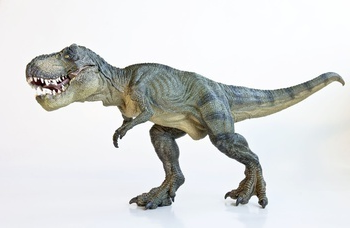

In [ ]:
flipped = cv2.flip(image, 1)
cv2_imshow(flipped)

## Cropping

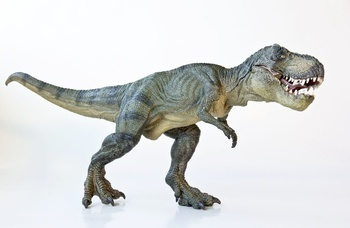

In [ ]:
img= cv2.imread('/content/gdrive/My Drive/GSSummit/d.png')
cv2_imshow(img)

In [ ]:
''' Here img takes four argument 
      Y1  -- Up  
      Y2  -- Down
      X1  -- Left
      X2  -- Right
 
'''
print('')

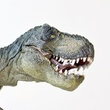

In [ ]:
cropped = img[20:130, 230:340]     # Cropping the Specified Portion of the Image
cv2_imshow(cropped)

## ColorSpaces

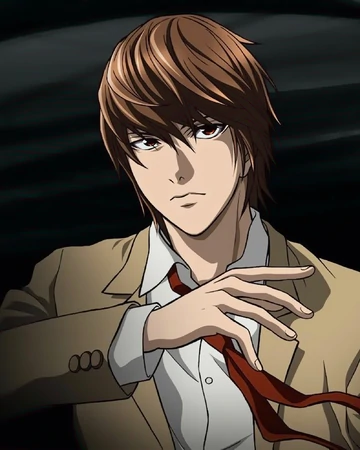

In [ ]:
image = cv2.imread('/content/gdrive/My Drive/GSSummit/light.png')
cv2_imshow(image)

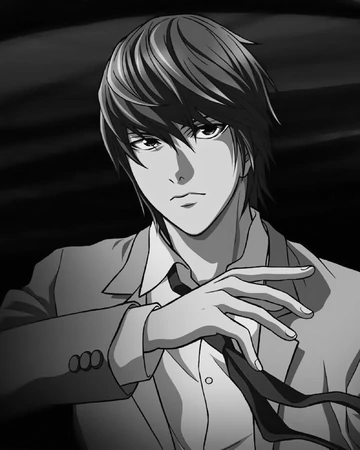

In [ ]:
 gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

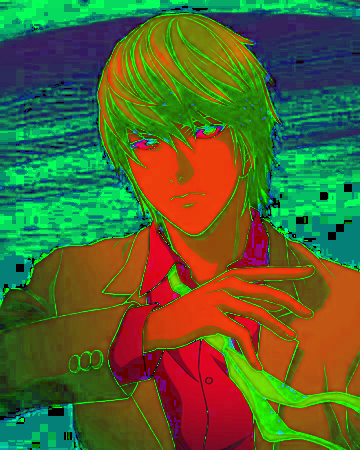

In [ ]:
 hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

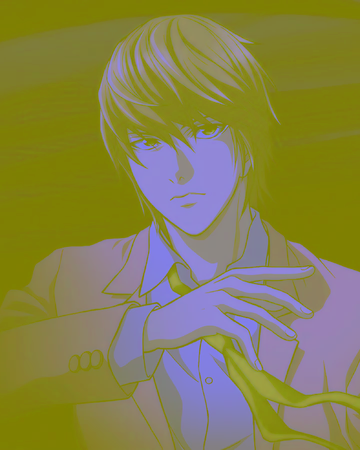

In [ ]:
 
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2_imshow(lab)

# Exercise
## 1. Perform Bitwise XOR and NOT operation 
## 2. Using Translation Shift the Image to Down and Right
## 3. Take an Image convert it into HSV and filter the Red Color (Optional)